<a href="https://colab.research.google.com/github/Chakri6677/data-set-analysis/blob/main/22BCE3900.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATASET
Name:D.Chakradhar
Reg no:22BCE3900


https://github.com/Chakri6677/data-set-analysis/blob/main/22BCE3900.ipynb

In [ ]:
#Loading the dataset
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/KosteckiDillon.csv")
print(df)


      rownames   id  time   dos hatype  age  airq  medication headache     sex
0            1    1   -11   753   Aura   30   9.0  continuing      yes  female
1            2    1   -10   754   Aura   30   7.0  continuing      yes  female
2            3    1    -9   755   Aura   30  10.0  continuing      yes  female
3            4    1    -8   756   Aura   30  13.0  continuing      yes  female
4            5    1    -7   757   Aura   30  18.0  continuing      yes  female
...        ...  ...   ...   ...    ...  ...   ...         ...      ...     ...
4147      4148  133    44  1232   Aura   26  20.0  continuing      yes    male
4148      4149  133    45  1233   Aura   26  27.0  continuing       no    male
4149      4150  133    46  1234   Aura   26  28.0  continuing       no    male
4150      4151  133    47  1235   Aura   26  33.0  continuing       no    male
4151      4152  133    48  1236   Aura   26  25.0  continuing      yes    male

[4152 rows x 10 columns]


Merging database-style dataframes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Basic information
df.info()

# Data Cleaning
df_clean = df.drop_duplicates()
print(df_clean)

# Fill missing values: numeric columns with median, categorical columns with mode
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
categorical_cols = df_clean.select_dtypes(exclude=[np.number]).columns

df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())
df_clean[categorical_cols] = df_clean[categorical_cols].fillna(df_clean[categorical_cols].mode().iloc[0])

# Merging, Appending, Concatenation
df_extra = pd.DataFrame({
    'new_col1': np.random.rand(len(df_clean)),
    'new_col2': np.random.rand(len(df_clean))
})
print(df_extra)

# Use pd.concat for merging instead of merge(
df_concat = pd.concat([df_clean, df_extra], axis=1)
print(  )

# Use pd.concat for appending instead of append()
df_appended = pd.concat([df_clean, df_clean])
print(df_appended)

# Use pd.merge for concatenation instead of concat()

df_merged = pd.merge(df_clean, df_extra, left_index=True, right_index=True)
print(df_merged)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4152 non-null   int64  
 1   id          4152 non-null   int64  
 2   time        4152 non-null   int64  
 3   dos         4152 non-null   int64  
 4   hatype      4152 non-null   object 
 5   age         4152 non-null   int64  
 6   airq        4152 non-null   float64
 7   medication  4152 non-null   object 
 8   headache    4152 non-null   object 
 9   sex         4152 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 324.5+ KB
      rownames   id  time   dos hatype  age  airq  medication headache     sex
0            1    1   -11   753   Aura   30   9.0  continuing      yes  female
1            2    1   -10   754   Aura   30   7.0  continuing      yes  female
2            3    1    -9   755   Aura   30  10.0  continuing      yes  female
3            4    1  

Hierarchical Indexing

In [ ]:
# Hierarchical Indexing
df_hier = df_clean.set_index(df_clean.columns[:2].tolist())
print(df_hier)



              time   dos hatype  age  airq  medication headache     sex
rownames id                                                            
1        1     -11   753   Aura   30   9.0  continuing      yes  female
2        1     -10   754   Aura   30   7.0  continuing      yes  female
3        1      -9   755   Aura   30  10.0  continuing      yes  female
4        1      -8   756   Aura   30  13.0  continuing      yes  female
5        1      -7   757   Aura   30  18.0  continuing      yes  female
...            ...   ...    ...  ...   ...         ...      ...     ...
4148     133    44  1232   Aura   26  20.0  continuing      yes    male
4149     133    45  1233   Aura   26  27.0  continuing       no    male
4150     133    46  1234   Aura   26  28.0  continuing       no    male
4151     133    47  1235   Aura   26  33.0  continuing       no    male
4152     133    48  1236   Aura   26  25.0  continuing      yes    male

[4152 rows x 8 columns]


Transformation Techniques

In [ ]:
# Transformation Techniques (on numeric columns)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

print("Original Data:")
print(df)

# 1. Data Deduplication (Remove duplicates)
df_deduplicated = df.drop_duplicates()
print("\nData After Deduplication:")
print(df_deduplicated)

# 2. Replacing values (example: replacing all instances of 'old_value' with 'new_value')
df_replaced = df_deduplicated.replace('old_value', 'new_value')
print("\nData After Replacing Values:")
print(df_replaced)

# 3. Handling missing data
# a. For numeric columns, fill missing values with the column mean
numeric_cols = df_replaced.select_dtypes(include=['float64', 'int64']).columns
df_replaced[numeric_cols] = df_replaced[numeric_cols].fillna(df_replaced[numeric_cols].mean())

# b. For non-numeric columns, fill missing values with a placeholder or the mode (most frequent value)
non_numeric_cols = df_replaced.select_dtypes(exclude=['float64', 'int64']).columns
df_replaced[non_numeric_cols] = df_replaced[non_numeric_cols].fillna(df_replaced[non_numeric_cols].mode().iloc[0])

print("\nData After Handling Missing Data:")
print(df_replaced)

# 4. Dropping missing values (drop rows with any missing values)
df_dropped = df_replaced.dropna()
print("\nData After Dropping Missing Values:")
print(df_dropped)

# 5. Applying StandardScaler (standardization)
scaler = StandardScaler()
df_scaled_standard = pd.DataFrame(scaler.fit_transform(df_replaced[numeric_cols]), columns=numeric_cols)
print("\nData After Standard Scaling:")
print(df_scaled_standard)

# 6. Applying MinMaxScaler (normalization)
minmax_scaler = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_replaced[numeric_cols]), columns=numeric_cols)
print("\nData After Min-Max Scaling:")
print(df_scaled_minmax)


Original Data:
      rownames   id  time   dos hatype  age  airq  medication headache     sex
0            1    1   -11   753   Aura   30   9.0  continuing      yes  female
1            2    1   -10   754   Aura   30   7.0  continuing      yes  female
2            3    1    -9   755   Aura   30  10.0  continuing      yes  female
3            4    1    -8   756   Aura   30  13.0  continuing      yes  female
4            5    1    -7   757   Aura   30  18.0  continuing      yes  female
...        ...  ...   ...   ...    ...  ...   ...         ...      ...     ...
4147      4148  133    44  1232   Aura   26  20.0  continuing      yes    male
4148      4149  133    45  1233   Aura   26  27.0  continuing       no    male
4149      4150  133    46  1234   Aura   26  28.0  continuing       no    male
4150      4151  133    47  1235   Aura   26  33.0  continuing       no    male
4151      4152  133    48  1236   Aura   26  25.0  continuing      yes    male

[4152 rows x 10 columns]

Data After

Discretization and Binning

In [ ]:
# Discretization and Binning
from sklearn.preprocessing import KBinsDiscretizer
binning = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df_binned = pd.DataFrame(binning.fit_transform(df_numeric), columns=numeric_columns)

print("\nData After Discretization and Binning:")
print(df_binned)




Data After Discretization and Binning:
      rownames   id  time  dos  age  airq
0          0.0  0.0   1.0  5.0  2.0   0.0
1          0.0  0.0   1.0  5.0  2.0   0.0
2          0.0  0.0   1.0  5.0  2.0   1.0
3          0.0  0.0   1.0  5.0  2.0   1.0
4          0.0  0.0   1.0  5.0  2.0   2.0
...        ...  ...   ...  ...  ...   ...
4147       9.0  9.0   5.0  9.0  1.0   2.0
4148       9.0  9.0   5.0  9.0  1.0   3.0
4149       9.0  9.0   5.0  9.0  1.0   3.0
4150       9.0  9.0   5.0  9.0  1.0   4.0
4151       9.0  9.0   6.0  9.0  1.0   3.0

[4152 rows x 6 columns]


Outlier Detection

In [ ]:
# Outlier detection using Z-Score
def z_score_outliers(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Apply Z-score method to detect and filter outliers
df_no_outliers_zscore = z_score_outliers(df_deduplicated[numeric_cols])
print("\nData After Filtering Outliers using Z-Score:")
print(df_no_outliers_zscore)

# Outlier detection using IQR
def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Apply IQR method to detect and filter outliers
df_no_outliers_iqr = iqr_outliers(df_deduplicated[numeric_cols])
print("\nData After Filtering Outliers using IQR:")
print(df_no_outliers_iqr)




Data After Filtering Outliers using Z-Score:
      rownames   id  time   dos  age  airq
0            1    1   -11   753   30   9.0
1            2    1   -10   754   30   7.0
2            3    1    -9   755   30  10.0
3            4    1    -8   756   30  13.0
4            5    1    -7   757   30  18.0
...        ...  ...   ...   ...  ...   ...
4147      4148  133    44  1232   26  20.0
4148      4149  133    45  1233   26  27.0
4149      4150  133    46  1234   26  28.0
4150      4151  133    47  1235   26  33.0
4151      4152  133    48  1236   26  25.0

[4006 rows x 6 columns]

Data After Filtering Outliers using IQR:
      rownames   id  time   dos  age  airq
0            1    1   -11   753   30   9.0
1            2    1   -10   754   30   7.0
2            3    1    -9   755   30  10.0
3            4    1    -8   756   30  13.0
4            5    1    -7   757   30  18.0
...        ...  ...   ...   ...  ...   ...
4147      4148  133    44  1232   26  20.0
4148      4149  133    45  

Univariate,Bivariate and Multivariate Analysis

Univariate Analysis:


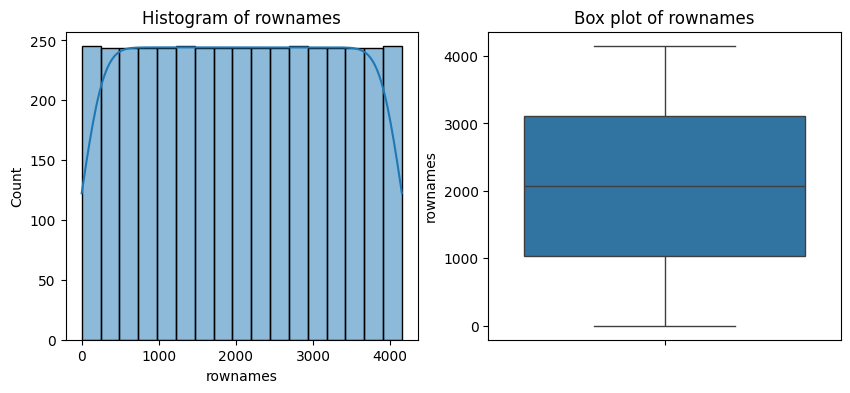

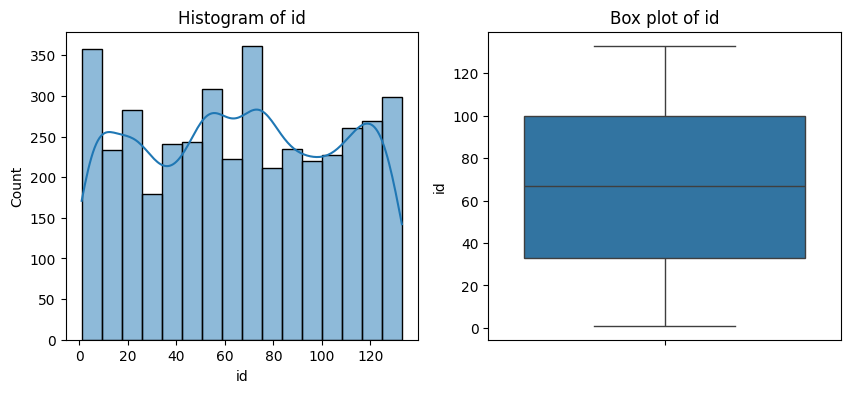

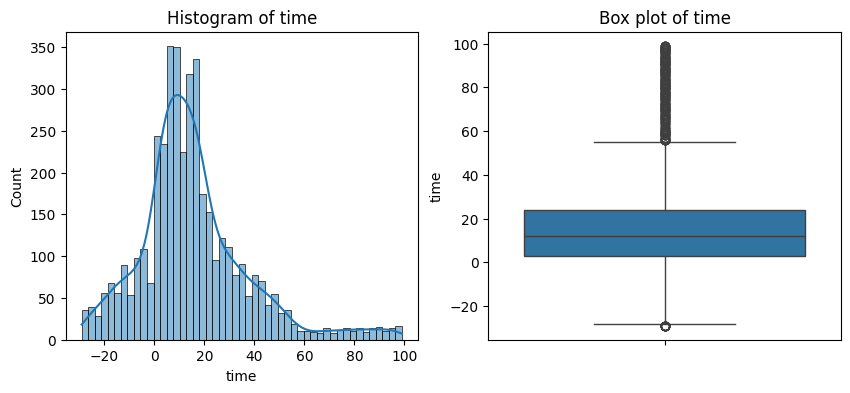

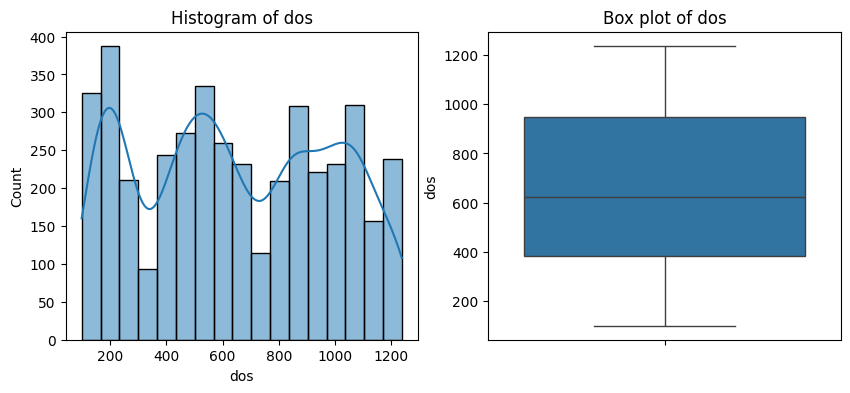

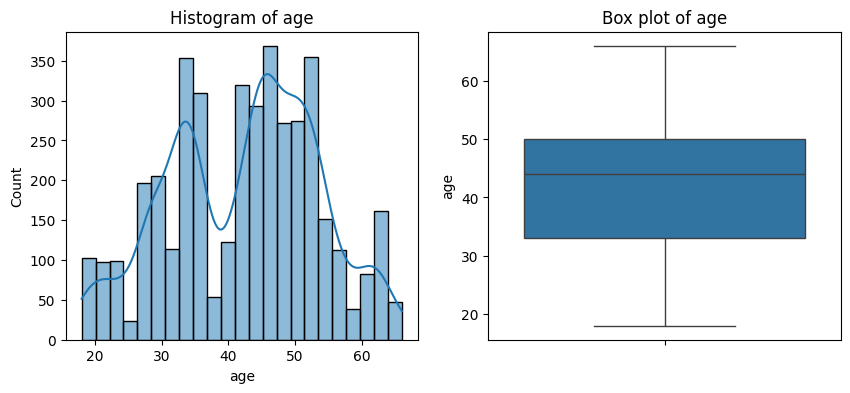

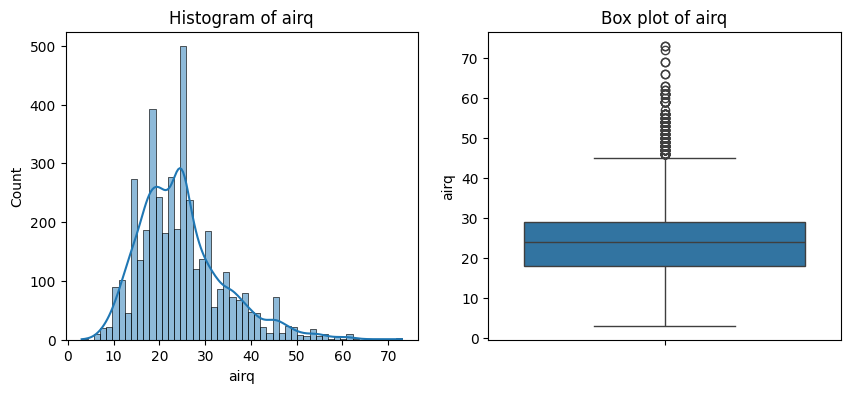

Bivariate Analysis:


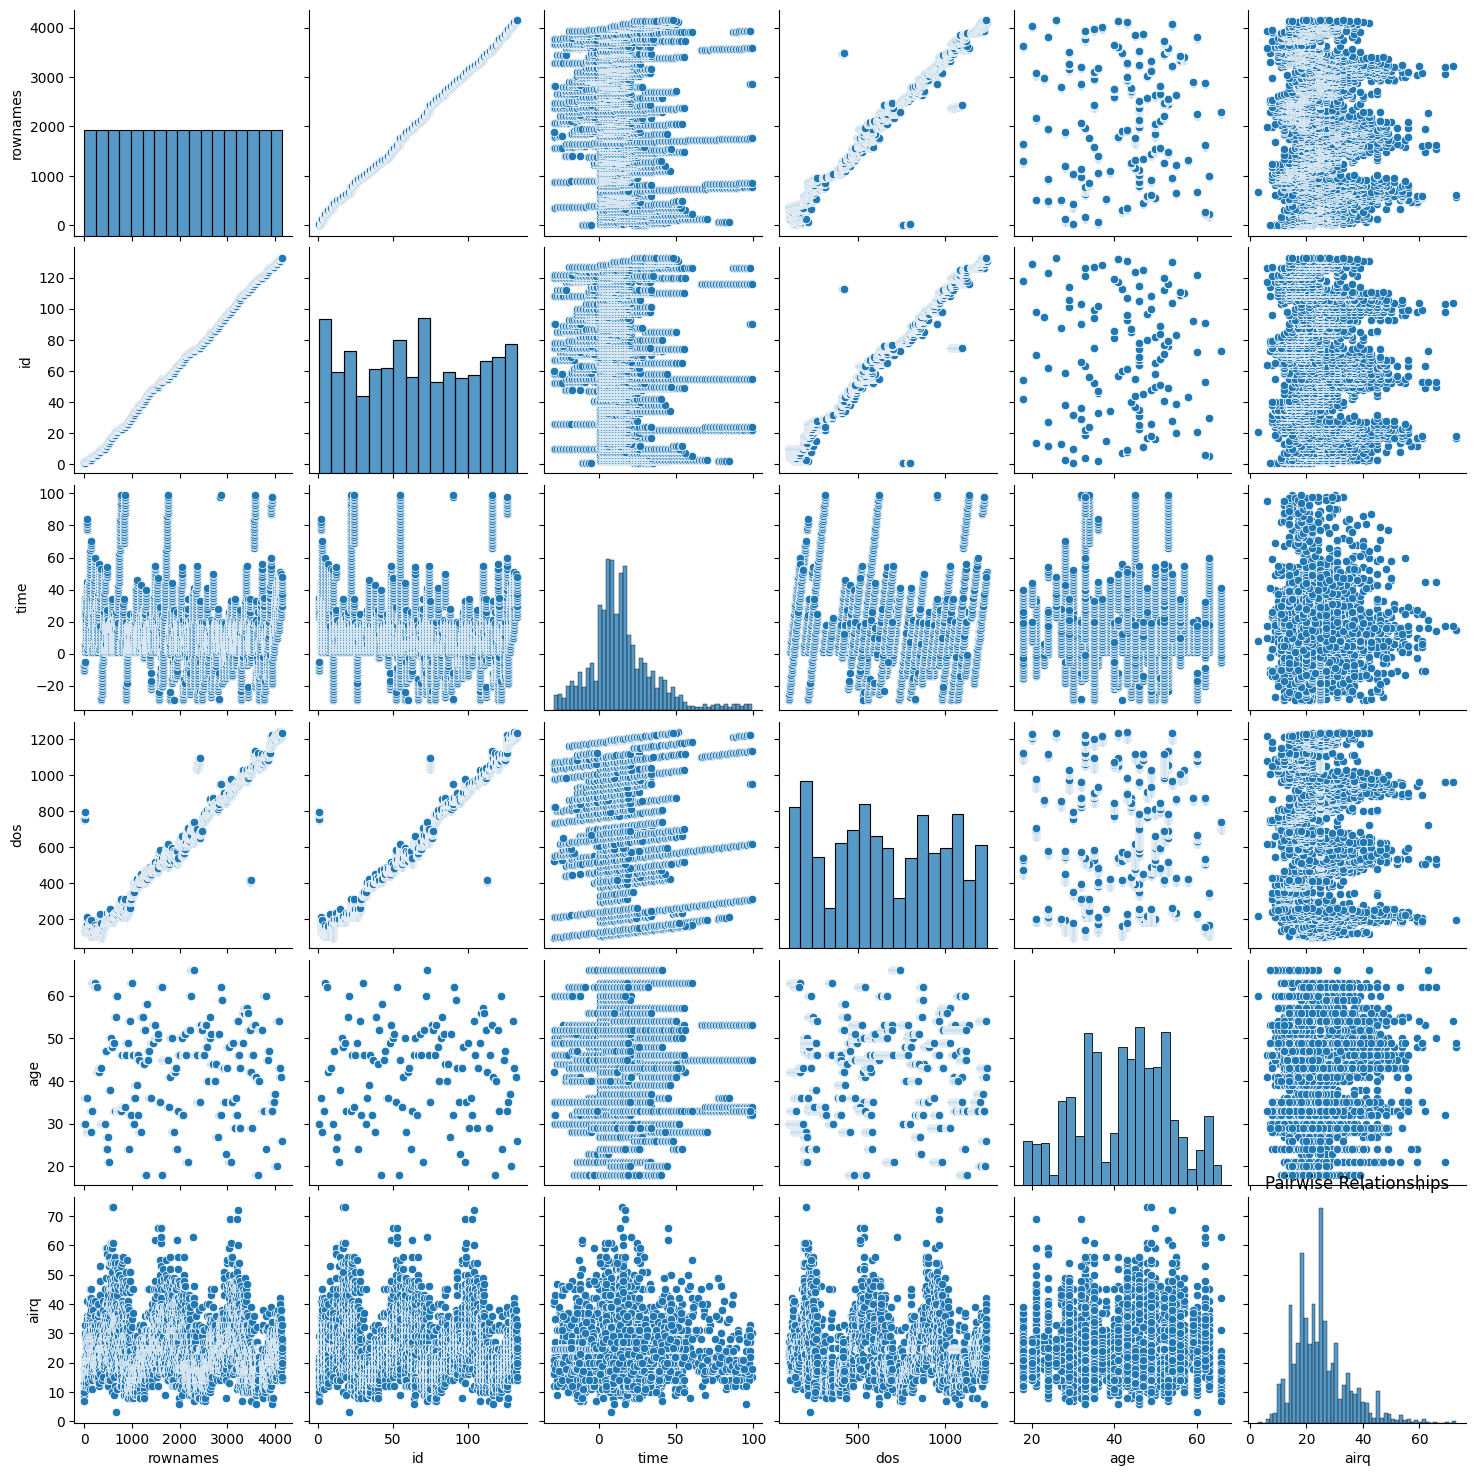

Multivariate Analysis & Correlation Matrix:


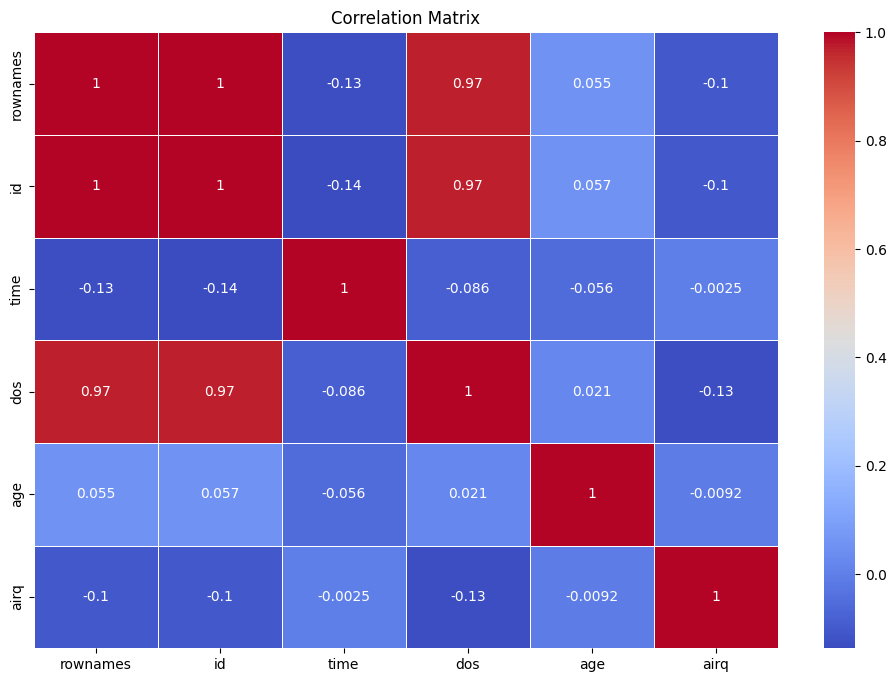

Correlation Matrix:
          rownames        id      time       dos       age      airq
rownames  1.000000  0.999403 -0.131084  0.971490  0.054772 -0.103562
id        0.999403  1.000000 -0.137080  0.971239  0.057145 -0.102202
time     -0.131084 -0.137080  1.000000 -0.085977 -0.055781 -0.002529
dos       0.971490  0.971239 -0.085977  1.000000  0.021148 -0.129934
age       0.054772  0.057145 -0.055781  0.021148  1.000000 -0.009163
airq     -0.103562 -0.102202 -0.002529 -0.129934 -0.009163  1.000000


In [ ]:
print("Univariate Analysis:")
for col in numeric_cols:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_deduplicated[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(df_deduplicated[col])
    plt.title(f'Box plot of {col}')

    plt.show()

# Bivariate Analysis: Scatter plots and pairwise relationships
print("Bivariate Analysis:")
sns.pairplot(df_deduplicated[numeric_cols])
plt.title('Pairwise Relationships')
plt.show()

# Multivariate Analysis: Heatmap for Correlation between variables
print("Multivariate Analysis & Correlation Matrix:")
correlation_matrix = df_deduplicated[numeric_cols].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Time Series Analysis

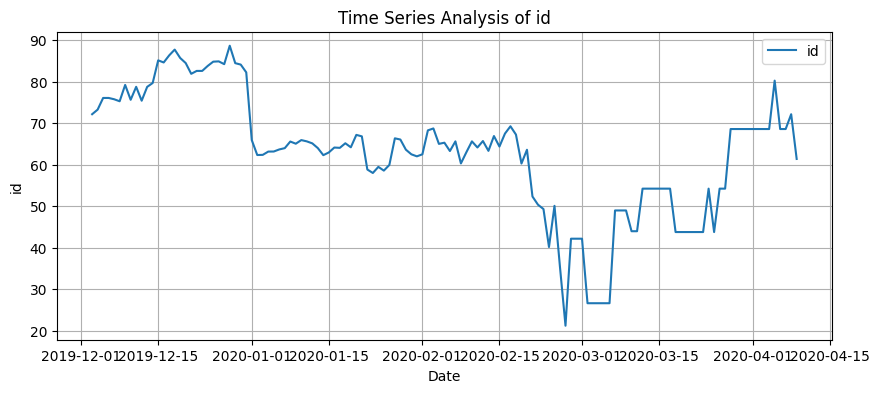


Accuracy Metrics for id:
Mean Absolute Deviation (MAD): 3.089699059043669
Mean Absolute Percentage Error (MAPE): 5.97%
Mean Squared Error (MSE): 30.214134484058043
Root Mean Squared Error (RMSE): 5.496738531534681


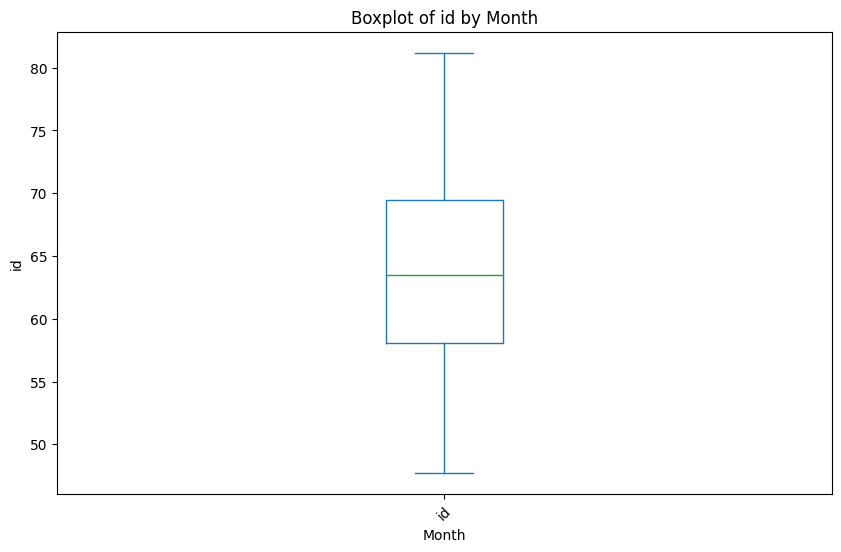

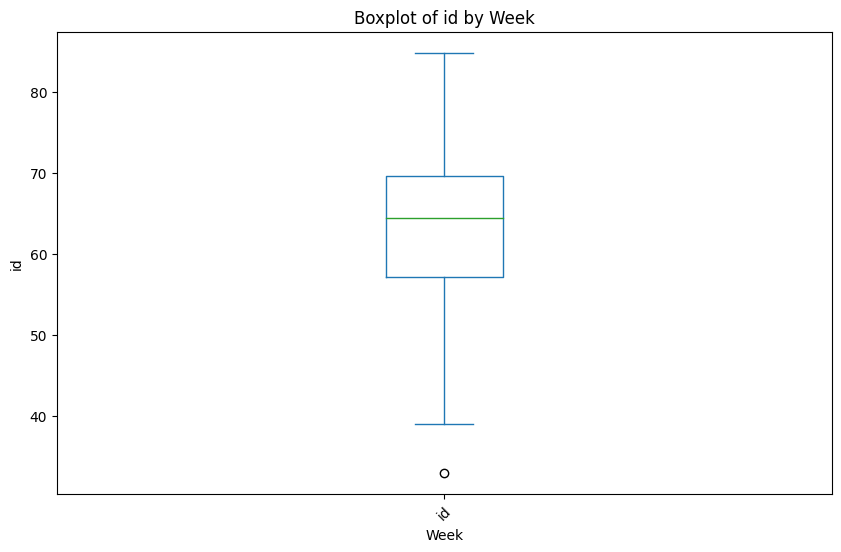

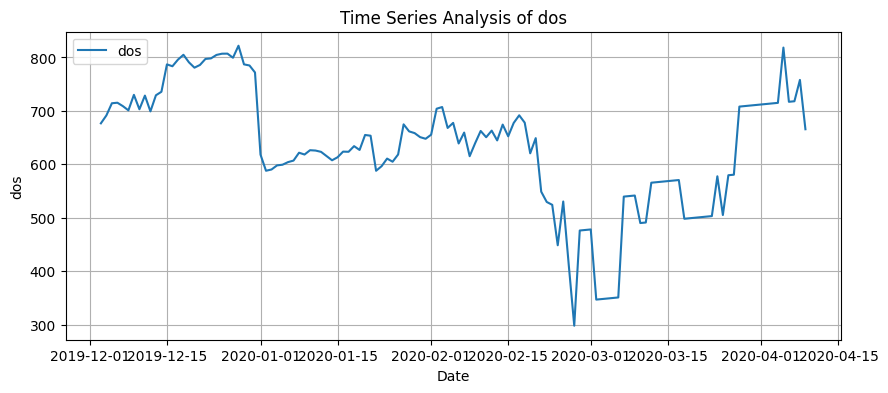


Accuracy Metrics for dos:
Mean Absolute Deviation (MAD): 26.002699030361903
Mean Absolute Percentage Error (MAPE): 4.61%
Mean Squared Error (MSE): 2130.2462209709242
Root Mean Squared Error (RMSE): 46.1545904647731


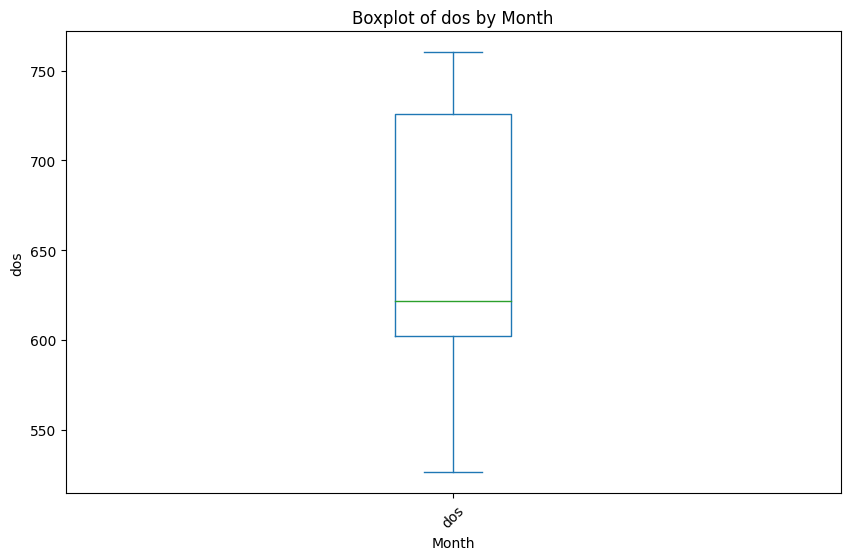

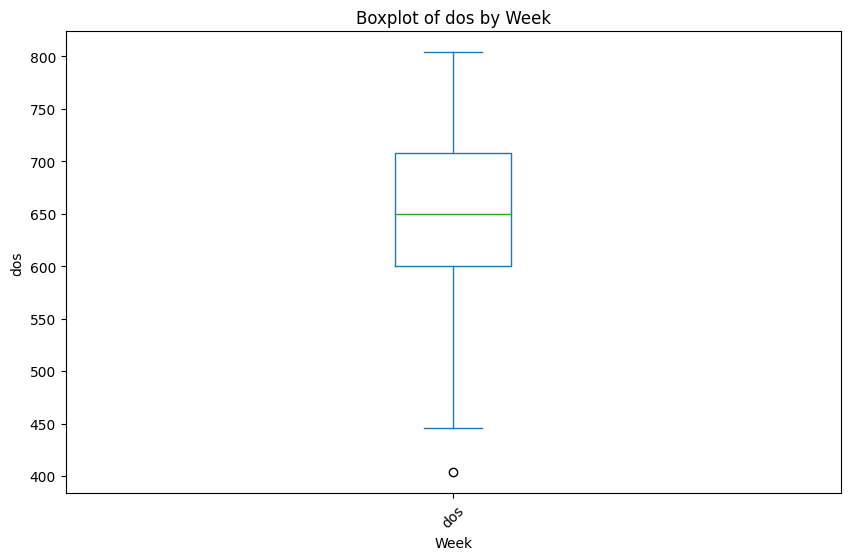

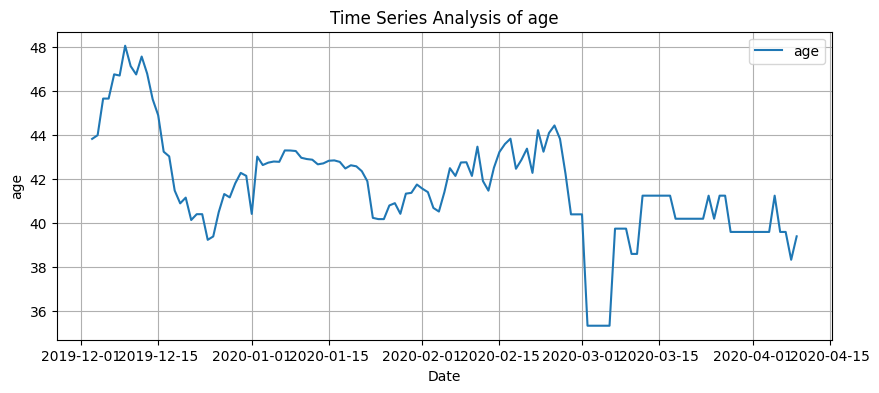


Accuracy Metrics for age:
Mean Absolute Deviation (MAD): 0.6084392219873584
Mean Absolute Percentage Error (MAPE): 1.47%
Mean Squared Error (MSE): 1.013774206763436
Root Mean Squared Error (RMSE): 1.0068635492277174


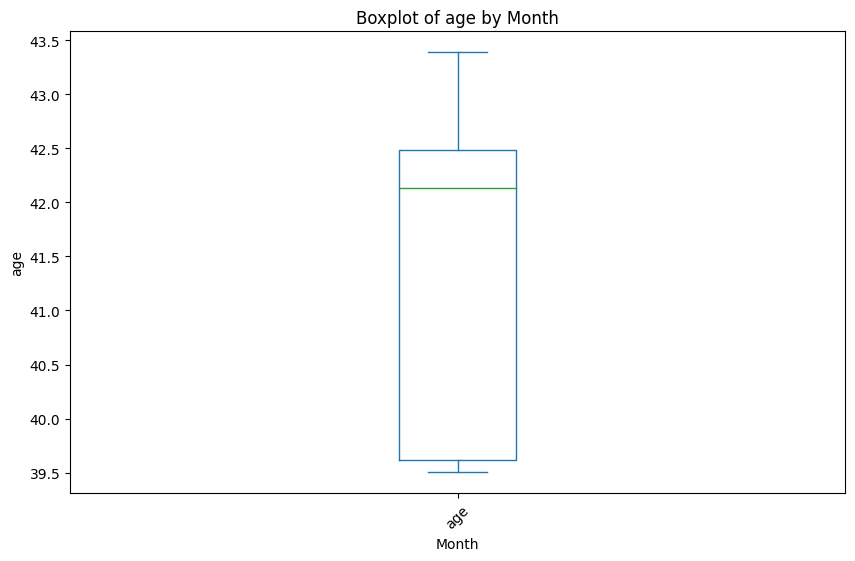

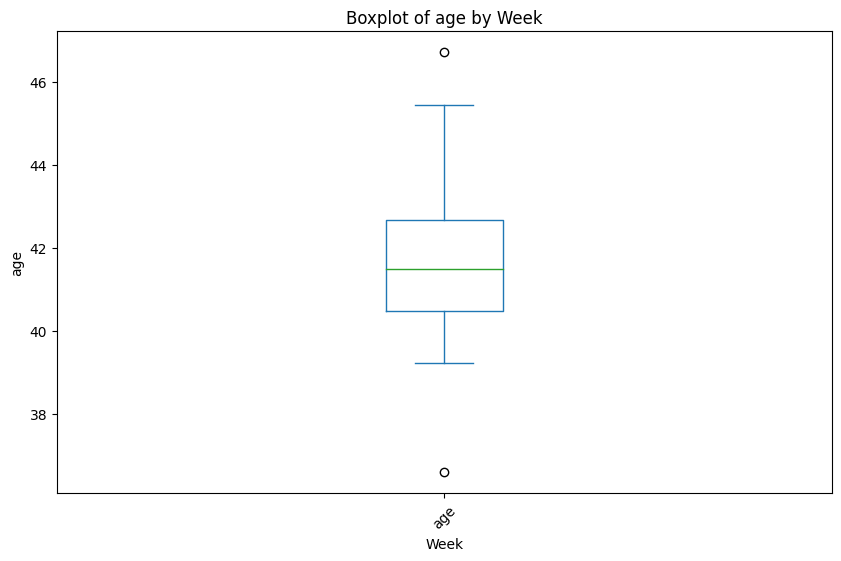

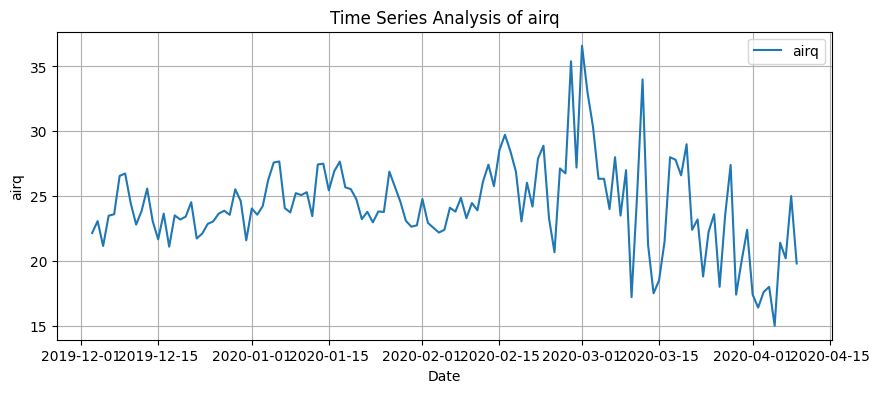


Accuracy Metrics for airq:
Mean Absolute Deviation (MAD): 2.427412037230434
Mean Absolute Percentage Error (MAPE): 10.28%
Mean Squared Error (MSE): 11.780685748751772
Root Mean Squared Error (RMSE): 3.432300358178429


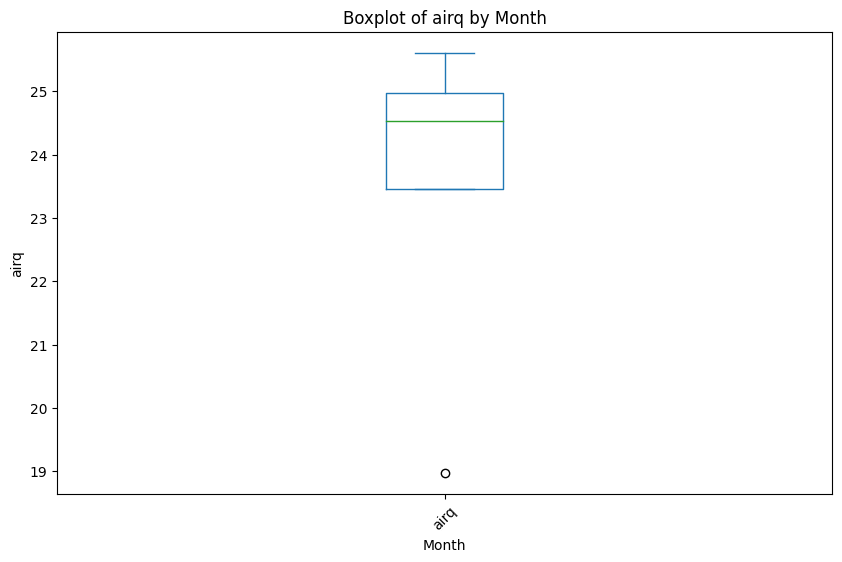

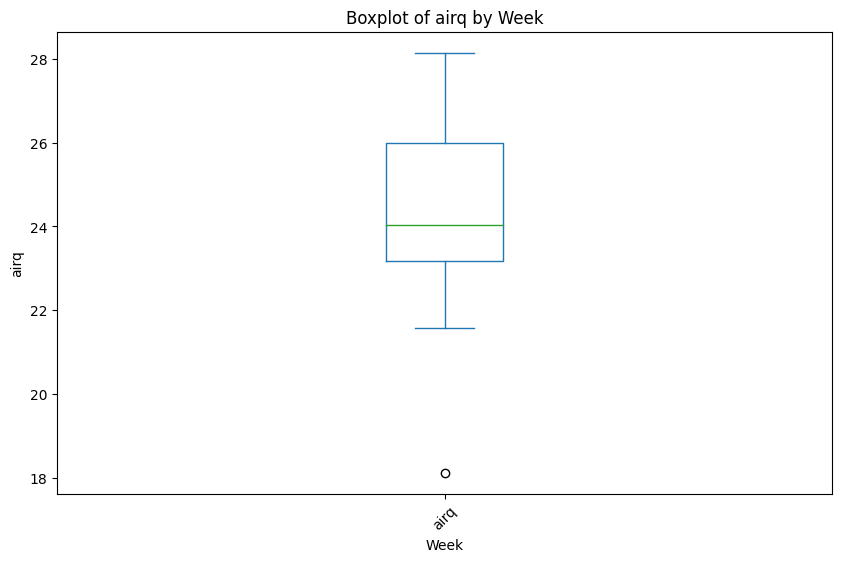

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/KosteckiDillon.csv")
start_date = '2020-01-01'
df.index = pd.to_datetime(start_date) + pd.to_timedelta(df['time'], unit='D')

# Select only numeric columns for resampling
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_resampled = df[numeric_cols].resample('D').mean()

columns_to_analyze = ['id', 'dos', 'age', 'airq']

for col in columns_to_analyze:
    valid_data = df_resampled[col].dropna()

    if valid_data.empty:
        print(f"No valid data available for {col}. Skipping...")
        continue

    plt.figure(figsize=(10, 4))
    plt.plot(valid_data.index, valid_data, label=col)
    plt.title(f'Time Series Analysis of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()

    df_resampled[f'predicted_{col}'] = df_resampled[col].shift(1)
    combined = df_resampled[[col, f'predicted_{col}']].dropna()

    if combined.empty:
        print(f"No valid data available for metrics calculation for {col}. Skipping...")
        continue

    actual_values = combined[col]
    predicted_values = combined[f'predicted_{col}']

    mad = np.mean(np.abs(actual_values - predicted_values))
    mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
    mse = mean_squared_error(actual_values, predicted_values)
    rmse = np.sqrt(mse)

    print(f"\nAccuracy Metrics for {col}:")
    print(f"Mean Absolute Deviation (MAD): {mad}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    df_grouped_monthly = df_resampled[col].resample('M').mean().dropna()
    if not df_grouped_monthly.empty:
        plt.figure(figsize=(10, 6))
        df_grouped_monthly.plot(kind='box')
        plt.title(f'Boxplot of {col} by Month')
        plt.ylabel(col)
        plt.xlabel('Month')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No valid data for monthly boxplot of {col}. Skipping...")

    df_grouped_weekly = df_resampled[col].resample('W').mean().dropna()
    if not df_grouped_weekly.empty:
        plt.figure(figsize=(10, 6))
        df_grouped_weekly.plot(kind='box')
        plt.title(f'Boxplot of {col} by Week')
        plt.ylabel(col)
        plt.xlabel('Week')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"No valid data for weekly boxplot of {col}. Skipping...")


Performing Statistical measures

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/KosteckiDillon.csv")


print("Statistical Summary of Numeric Variables:")
print(df.describe())

print("\nStatistical Summary of Categorical Variables:")
print(df.describe(include=['object']))

Statistical Summary of Numeric Variables:
          rownames           id         time          dos          age  \
count  4152.000000  4152.000000  4152.000000  4152.000000  4152.000000   
mean   2076.500000    66.386802    15.455684   646.705925    42.363921   
std    1198.723488    39.121812    21.737211   335.770123    11.201244   
min       1.000000     1.000000   -29.000000    98.000000    18.000000   
25%    1038.750000    33.000000     3.000000   384.000000    33.000000   
50%    2076.500000    67.000000    12.000000   623.000000    44.000000   
75%    3114.250000   100.000000    24.000000   950.000000    50.000000   
max    4152.000000   133.000000    99.000000  1239.000000    66.000000   

              airq  
count  4152.000000  
mean     24.826012  
std       9.514274  
min       3.000000  
25%      18.000000  
50%      24.000000  
75%      29.000000  
max      73.000000  

Statistical Summary of Categorical Variables:
         hatype  medication headache     sex
count     

Data Elaboration

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
rownames      0
id            0
time          0
dos           0
hatype        0
age           0
airq          0
medication    0
headache      0
sex           0
dtype: int64


1-D Statistical Data Analysis


1-D Analysis of 'hatype':
hatype
No Aura    1985
Aura       1710
Mixed       457
Name: count, dtype: int64


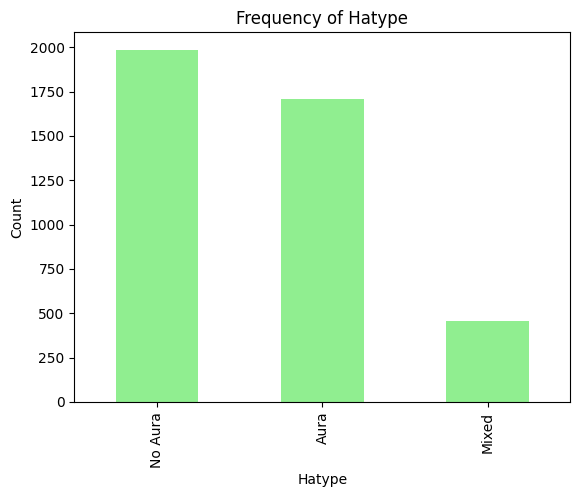

In [7]:
hatype_counts = df['hatype'].value_counts()
print("\n1-D Analysis of 'hatype':")
print(hatype_counts)
hatype_counts.plot(kind='bar', color='lightgreen')
plt.title('Frequency of Hatype')
plt.xlabel('Hatype')
plt.ylabel('Count')
plt.show()

 2-D Statistical Data Analysis and Contingency Tables

In [9]:
contingency_table = pd.crosstab(df['hatype'], df['sex'])
print("\n2-D Contingency Table between 'hatype' and 'sex':")
print(contingency_table)


2-D Contingency Table between 'hatype' and 'sex':
sex      female  male
hatype               
Aura       1593   117
Mixed       291   166
No Aura    1661   324


n-D Statistical Data Analysis

In [10]:
nD_contingency_table = pd.crosstab(index=[df['hatype'], df['sex']], columns=df['medication'])
print("\nn-D Contingency Table between 'hatype', 'sex', and 'medication':")
print(nD_contingency_table)


n-D Contingency Table between 'hatype', 'sex', and 'medication':
medication      continuing  none  reduced
hatype  sex                              
Aura    female        1018   314      261
        male            61    40       16
Mixed   female         159     0      132
        male            35   113       18
No Aura female         979   278      404
        male           134    40      150


Scatter plot for two numeric variables,Dot chart and Bar plot for 'hatype' distribution

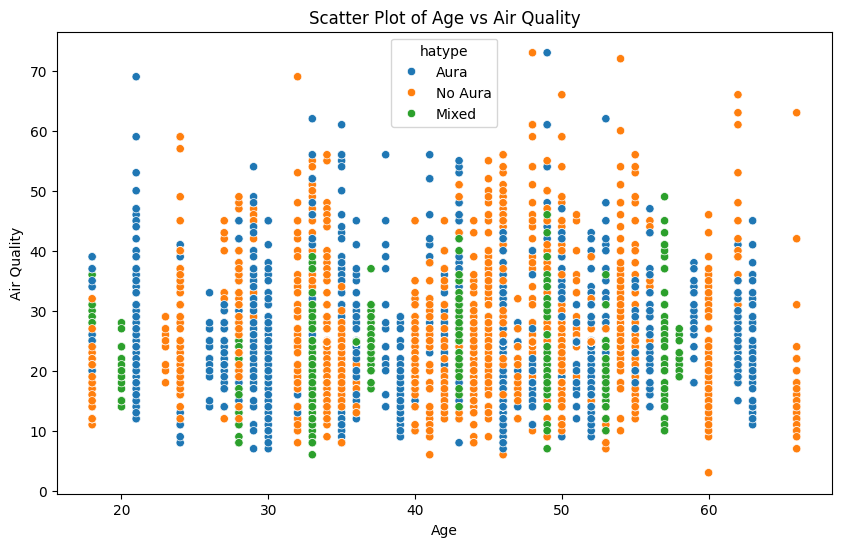

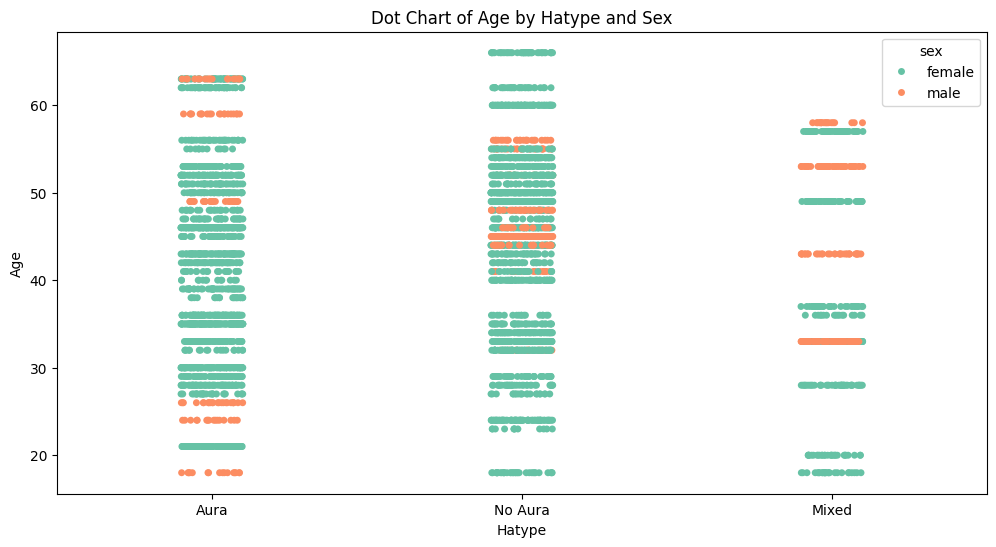

<ipython-input-14-d38f5e3ac126>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hatype', data=df, palette='cool')


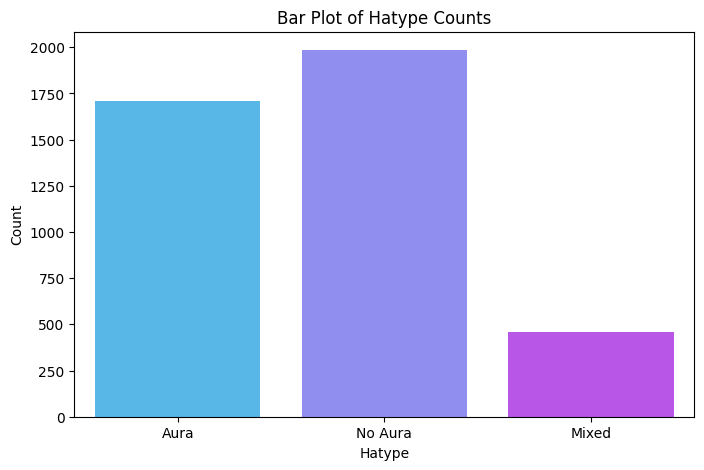

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='airq', hue='hatype', data=df)
plt.title('Scatter Plot of Age vs Air Quality')
plt.xlabel('Age')
plt.ylabel('Air Quality')
plt.show()
# Dot chart (strip plot) for categorical variable analysis (e.g., 'age' by 'hatype' and 'sex')
plt.figure(figsize=(12, 6))
sns.stripplot(x='hatype', y='age', hue='sex', data=df, jitter=True, palette='Set2')
plt.title('Dot Chart of Age by Hatype and Sex')
plt.xlabel('Hatype')
plt.ylabel('Age')
plt.show()

# Bar plot for 'hatype' distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='hatype', data=df, palette='cool')
plt.title('Bar Plot of Hatype Counts')
plt.xlabel('Hatype')
plt.ylabel('Count')
plt.show()

Spectral clustering

Cluster distribution:
SpectralCluster
1    3882
0     244
2      26
Name: count, dtype: int64

Silhouette Score: 0.4059797907146701


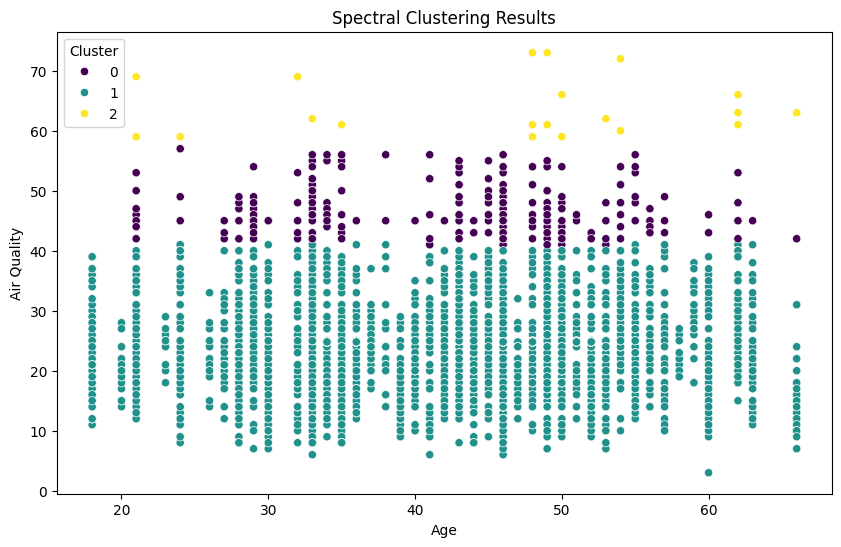

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import DBSCAN
features = df[['age', 'airq']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Spectral Clustering
spectral_model = SpectralClustering(n_clusters=3, affinity='rbf', gamma=1.0, random_state=42)
labels = spectral_model.fit_predict(features_scaled)
df['SpectralCluster'] = labels
print("Cluster distribution:")
print(df['SpectralCluster'].value_counts())
silhouette_avg = silhouette_score(features_scaled, labels)
print("\nSilhouette Score:", silhouette_avg)
# Scatter plot for Spectral Clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features.iloc[:, 0], y=features.iloc[:, 1], hue=labels, palette='viridis')
plt.title('Spectral Clustering Results')
plt.xlabel('Age')
plt.ylabel('Air Quality')
plt.legend(title='Cluster')
plt.show()


K means Clustering

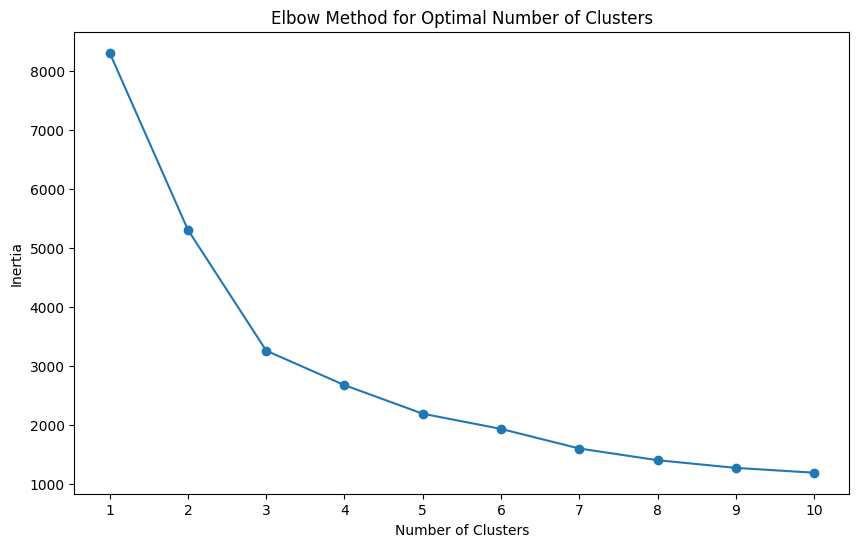

Cluster distribution:
KMeansCluster
2    1936
1    1470
0     746
Name: count, dtype: int64


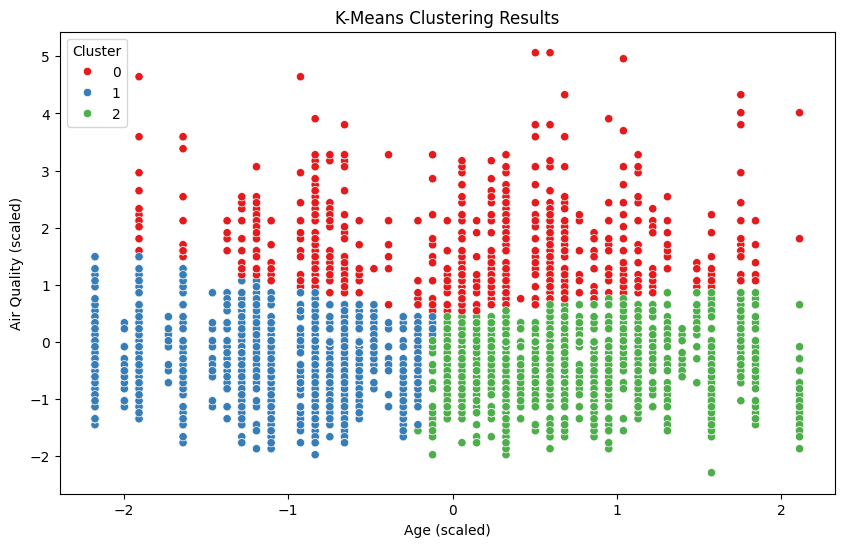

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data_numeric = df[['age', 'airq']].dropna()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()

features = df[['age', 'airq']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
kmeans_model = KMeans(n_clusters=3, random_state=42)
labels = kmeans_model.fit_predict(features_scaled)
df['KMeansCluster'] = labels
print("Cluster distribution:")
print(df['KMeansCluster'].value_counts())
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=labels, palette='Set1')
plt.title('K-Means Clustering Results')
plt.xlabel('Age (scaled)')
plt.ylabel('Air Quality (scaled)')
plt.legend(title='Cluster')
plt.show()


Hierarchical Clustering

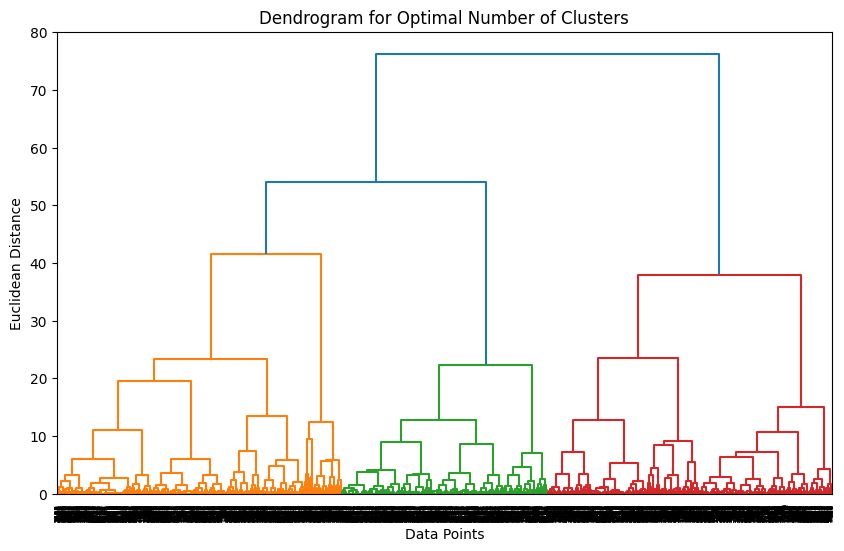

In [27]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
data_numeric = df[['age', 'airq']].dropna()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram for Optimal Number of Clusters')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


Agglemorative Clustering

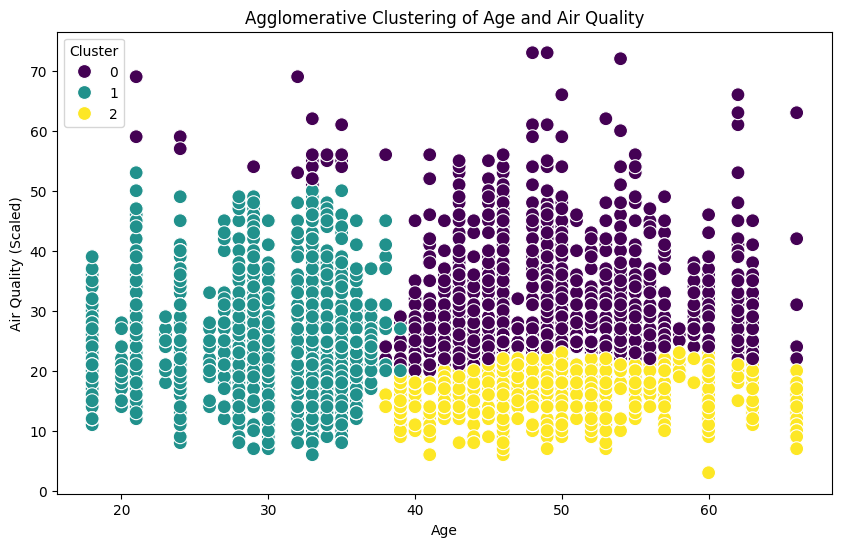

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
data_numeric = df[['age', 'airq']].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(data_scaled)
data_numeric['Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='airq', hue='Cluster', palette='viridis', data=data_numeric, s=100)
plt.title('Agglomerative Clustering of Age and Air Quality')
plt.xlabel('Age')
plt.ylabel('Air Quality (Scaled)')
plt.legend(title='Cluster')
plt.show()


Outlier detection using clustering

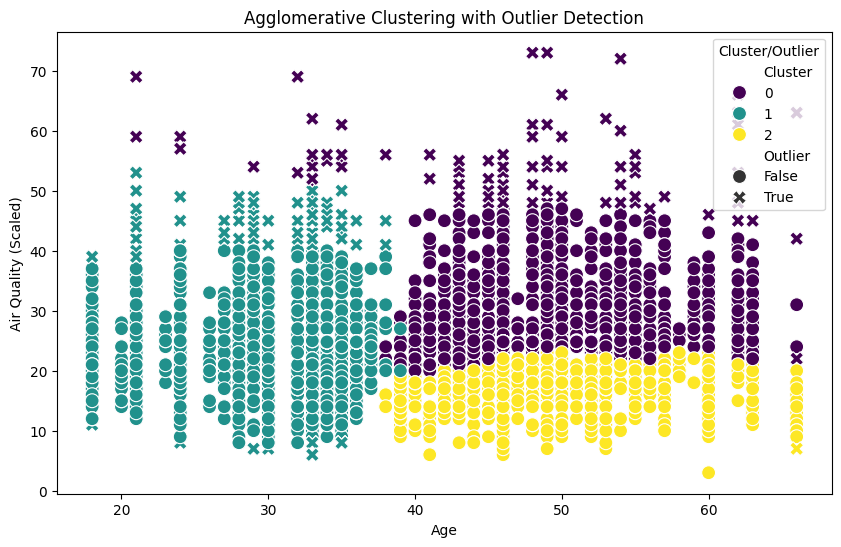

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_numeric = df[['age', 'airq']].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agg_clustering.fit_predict(data_scaled)
data_numeric['Cluster'] = clusters
centroids = []
for i in range(n_clusters):
    cluster_points = data_scaled[clusters == i]
    centroids.append(cluster_points.mean(axis=0))
centroids = np.array(centroids)
distances = np.array([cdist([data_scaled[i]], [centroids[clusters[i]]])[0][0] for i in range(len(data_scaled))])
threshold = np.percentile(distances, 95)
data_numeric['Outlier'] = distances > threshold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='airq', hue='Cluster', palette='viridis', data=data_numeric, s=100, style='Outlier', markers={False: 'o', True: 'X'})
plt.title('Agglomerative Clustering with Outlier Detection')
plt.xlabel('Age')
plt.ylabel('Air Quality (Scaled)')
plt.legend(title='Cluster/Outlier')
plt.show()


Linear methods for dimensionality reduction

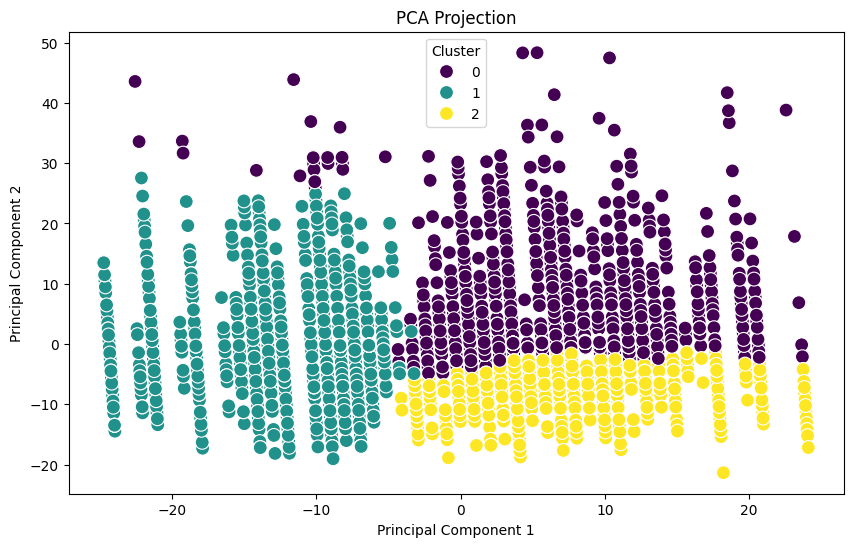

Explained variance ratio of each principal component: [0.579235   0.41876315]


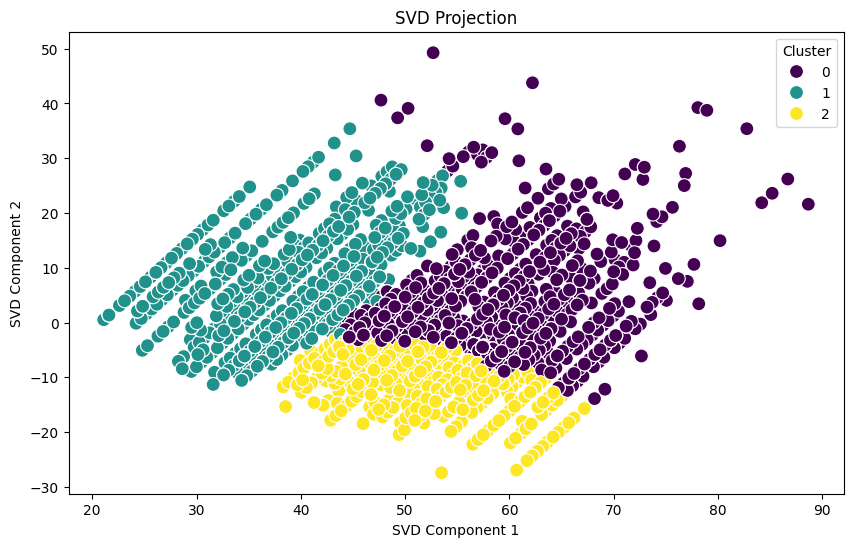

Explained variance ratio of each SVD component: [0.53434041 0.4626111 ]


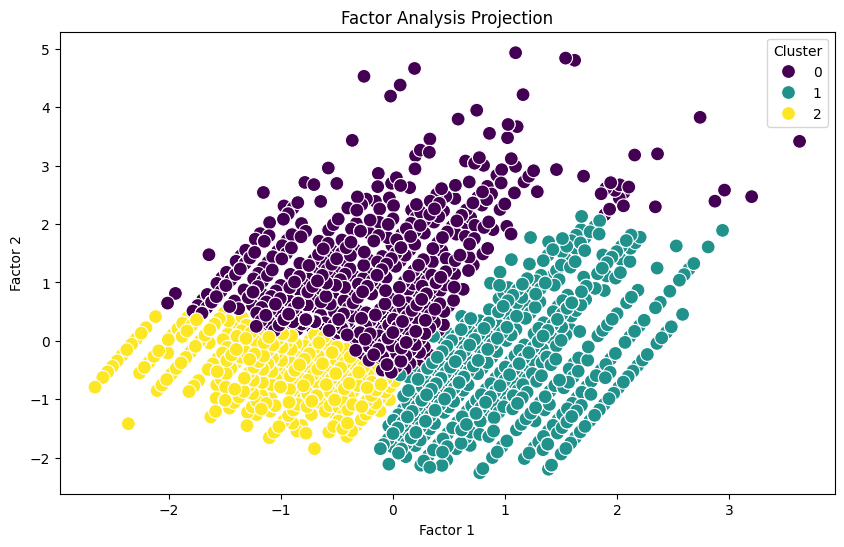

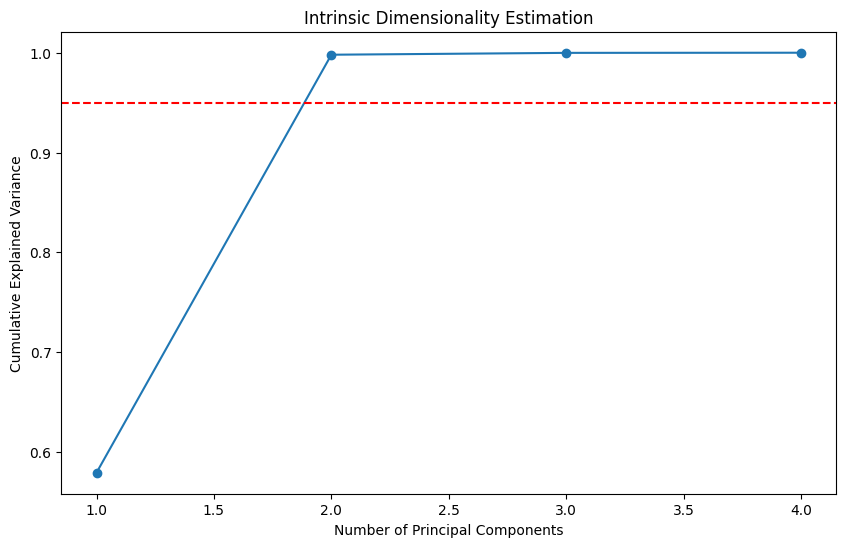

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
#1.Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_numeric)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data_numeric['Cluster'], palette='viridis', s=100)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print("Explained variance ratio of each principal component:", pca.explained_variance_ratio_)
#2.Singular Value Decomposition
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(data_numeric)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=svd_result[:, 0], y=svd_result[:, 1], hue=data_numeric['Cluster'], palette='viridis', s=100)
plt.title('SVD Projection')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.show()
print("Explained variance ratio of each SVD component:", svd.explained_variance_ratio_)

#3.Factor Analysis
from sklearn.decomposition import FactorAnalysis
factor = FactorAnalysis(n_components=2)
factor_result = factor.fit_transform(data_numeric)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=factor_result[:, 0], y=factor_result[:, 1], hue=data_numeric['Cluster'], palette='viridis', s=100)
plt.title('Factor Analysis Projection')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

#4.Intrinsic Dimensionality
pca_full = PCA()
pca_full.fit(data_numeric)

# Calculate cumulative explained variance
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Intrinsic Dimensionality Estimation')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()


